# DECISION TREE🌳

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = pd.read_csv('recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [7]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
x = df.drop(['HiringDecision'], axis=1)
y = df['HiringDecision']

In [10]:
print(x.shape)
print(y.shape)

(1500, 10)
(1500,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(1200, 10)
(300, 10)


In [12]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,              
    min_samples_split=4,      
    min_samples_leaf=2,      
    random_state=42
)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [13]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       215
           1       0.70      0.82      0.76        85

    accuracy                           0.85       300
   macro avg       0.81      0.84      0.82       300
weighted avg       0.86      0.85      0.85       300



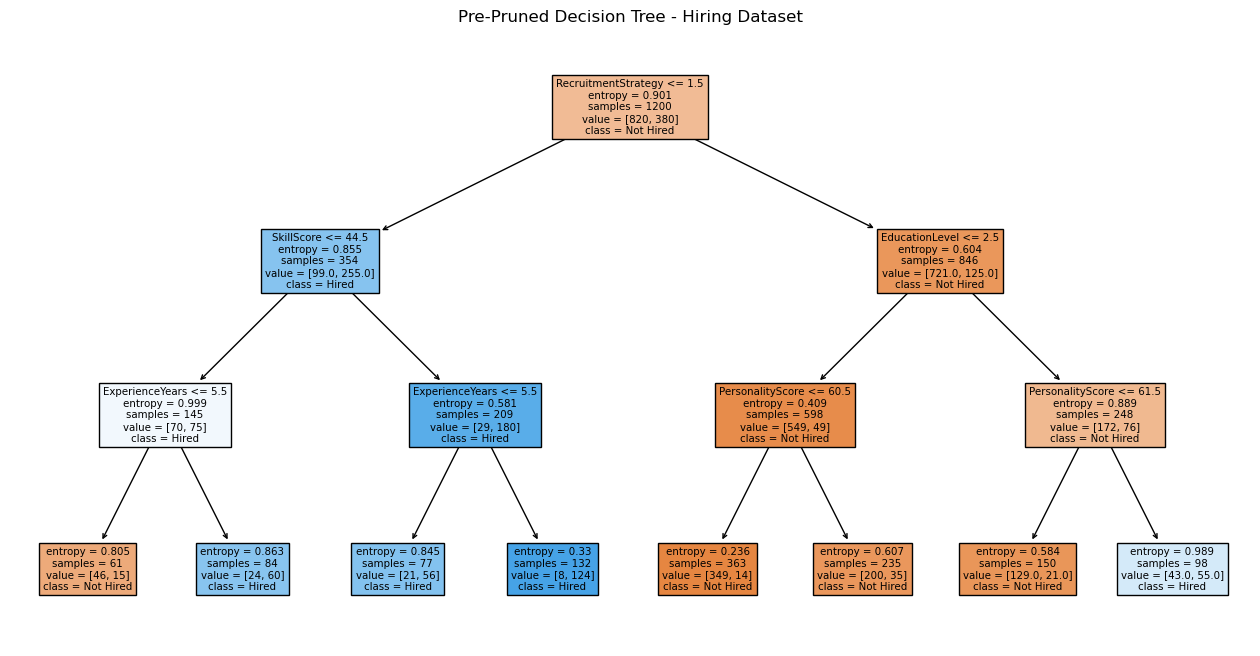

In [14]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=x.columns, class_names=['Not Hired', 'Hired'], filled=True)
plt.title("Pre-Pruned Decision Tree - Hiring Dataset")
plt.show()

In [15]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [16]:
trees = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(x_train, y_train)
    trees.append(model)

test_scores = [tree.score(x_test, y_test) for tree in trees]


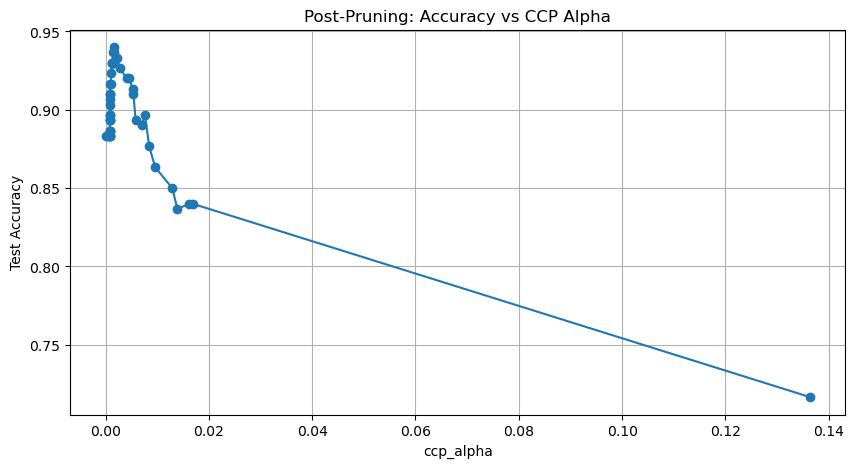

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, test_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Post-Pruning: Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()

In [18]:
best_index = test_scores.index(max(test_scores))
best_tree = trees[best_index]

plt.figure(figsize=(160, 80))
plot_tree(best_tree, feature_names=x.columns, class_names=['Not Hired', 'Hired'], filled=True)
plt.title("Post-Pruned Decision Tree")
plt.show()